# 📌 1. Introduction

# 💡 Histogram Equalization in OpenCV (Python Tutorial)

This Jupyter Notebook provides a practical guide to **Histogram Equalization**
using the OpenCV (`cv2`) library in Python.

Histogram equalization is a method to improve the **contrast** in images by stretching out the intensity range.

**Core Concepts Covered:**
- Understanding Image Histograms
- Global Histogram Equalization (`cv2.equalizeHist`)
- Contrast Limited Adaptive Histogram Equalization (CLAHE)
- Cumulative Distribution Function (CDF) intuition

Each section includes:
- Mathematical intuition
- OpenCV API usage
- Comparative visualizations


# 📌 2. Imports and Setup

In [10]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from tools.tools import LearnTools

learn_tools = LearnTools()
%matplotlib inline

# 📌 3. Load Image

In [11]:
# Image URLs
# img_url = "https://i.ibb.co/5x276TvQ/1.jpg"
img_url = "https://i.ibb.co/QjkCQ6Vm/2.jpg"

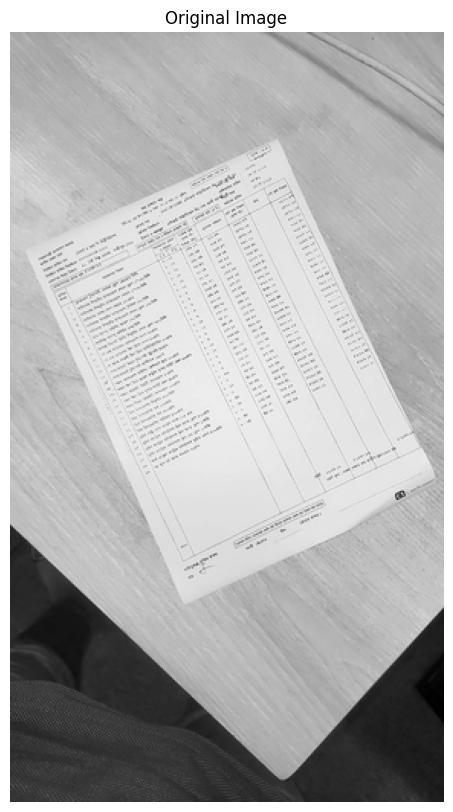

In [12]:
if os.path.exists("testImage.jpg"):
    image = cv2.imread("testImage.jpg")
else:
    pil_image = await learn_tools.get_image(img_url=img_url, padding=0)
    pil_image.save("testImage.jpg", "JPEG")
    image = learn_tools.pil_to_cv2(pil_image)

# Convert to grayscale (Equalization is typically performed on single channels)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# plt.imshow(gray, cmap='gray')
# plt.title("Original Low Contrast Image")
# plt.show()

learn_tools.show_multiple_images(
    image_plotting_data=[
        {'title': 'Original Image', 'image': gray, 'cmap': 'gray'}
    ]
)

# 📊 4. The Theory: Histogram and CDF

## What is a Histogram?
It is a plot representing the distribution of pixel intensities. 

**Equalization** works by mapping the input pixel intensities to a new distribution so that the **Cumulative Distribution Function (CDF)** is linear.

### Mathematical View
For an image with $L$ possible intensity levels:
$$h(v) = \text{round} \left( \frac{cdf(v) - cdf_{min}}{(M \times N) - cdf_{min}} \times (L - 1) \right)$$



# 🌓 5. Global Histogram Equalization

## 5. Standard Equalization

This considers the global contrast of the image. It is effective when the pixel values are confined to a narrow range.

### OpenCV API
`dst = cv2.equalizeHist(src)`

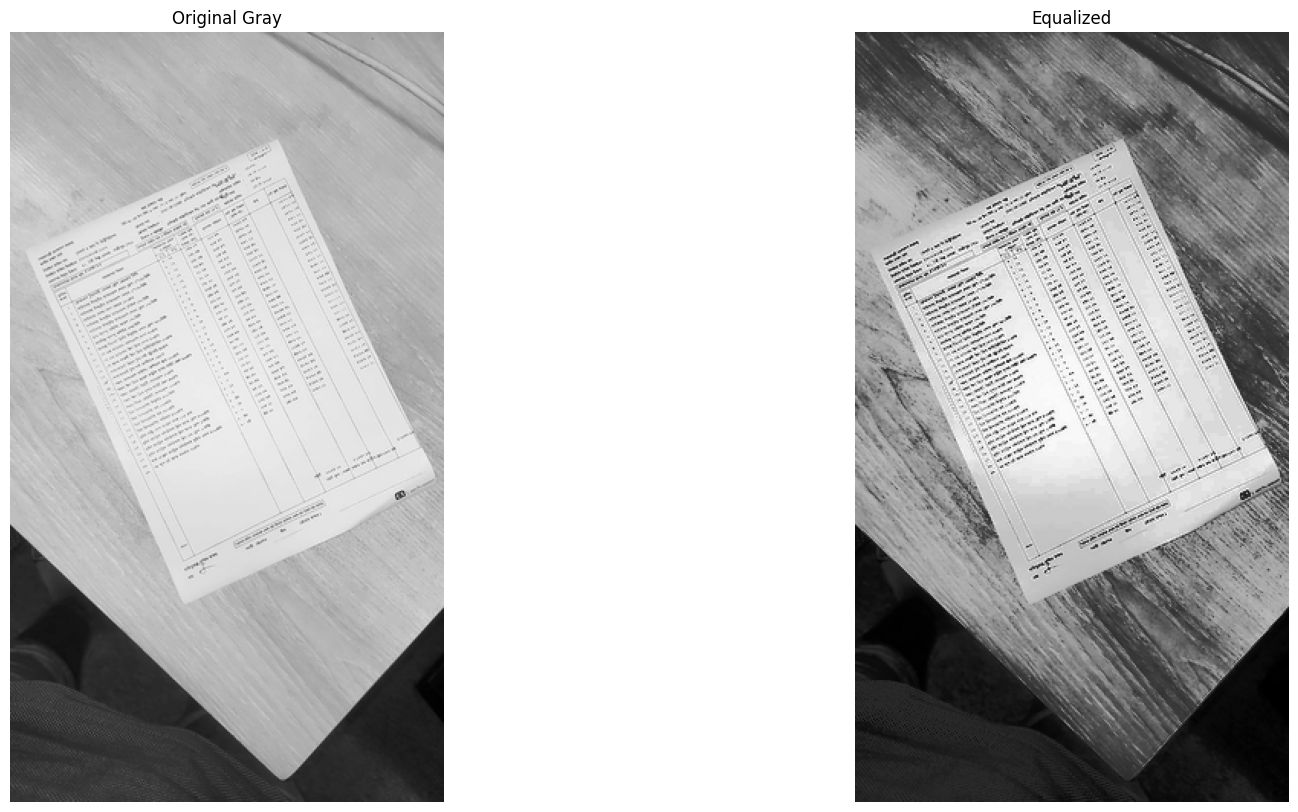

In [13]:
equ = cv2.equalizeHist(gray)

learn_tools.show_multiple_images([
    {"title": "Original Gray", "image": gray},
    {"title": "Equalized", "image": equ}
])

# 🔍 6. CLAHE (Adaptive Histogram Equalization)

## 6. CLAHE

Global equalization can sometimes over-amplify noise or lose details in very bright/dark areas. **CLAHE** divides the image into small tiles (default 8x8) and equalizes them individually.

### Key Parameters
- `clipLimit`: Threshold for contrast limiting.
- `tileGridSize`: Size of the grid for localized equalization.

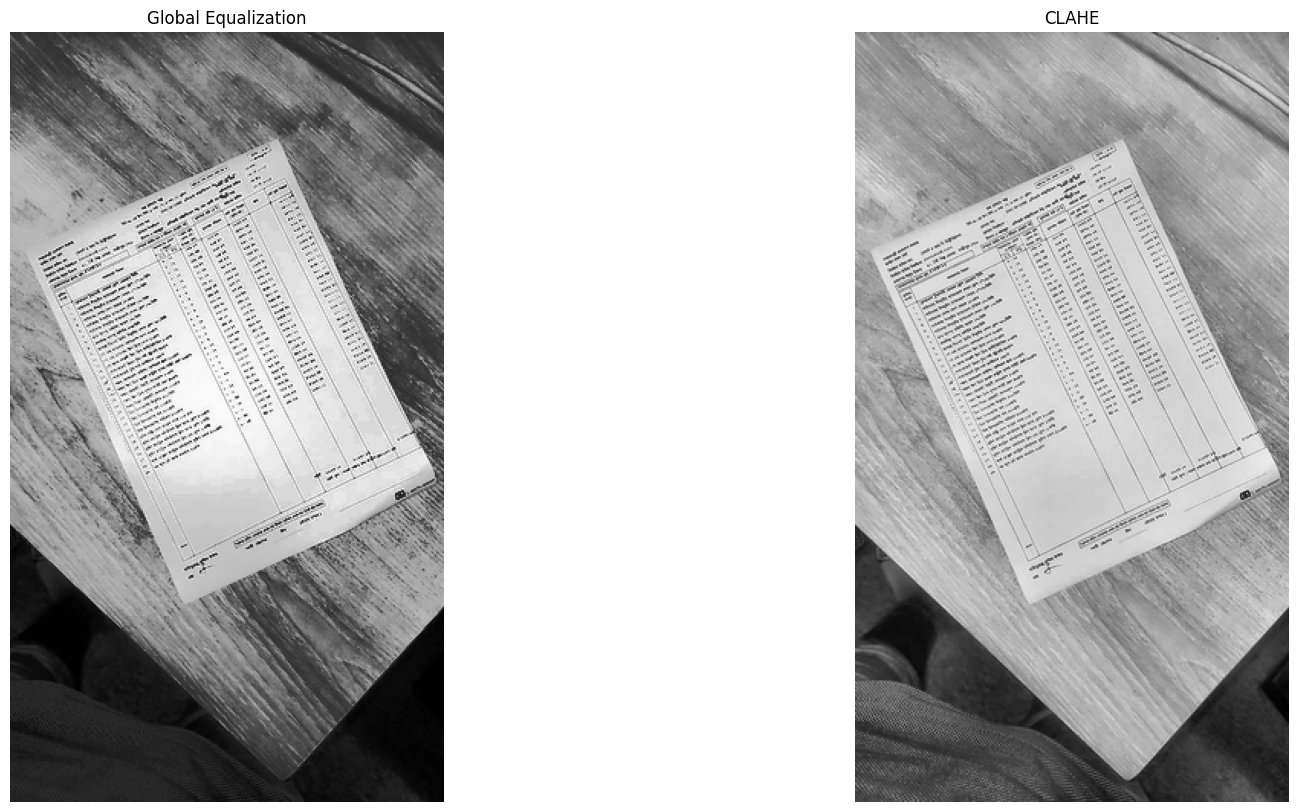

In [14]:
# Create a CLAHE object
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(gray)

learn_tools.show_multiple_images([
    {"title": "Global Equalization", "image": equ},
    {"title": "CLAHE", "image": cl1}
])

# 📊 7. Summary Table

## Comparison of Techniques

| Technique | Scope | Best For |
|---------|------|-------------|
| Standard Histogram | Global | Uniformly low contrast images |
| CLAHE | Local (Adaptive) | Images with varying lighting conditions |
| Normalization | Linear | Simple scaling of intensity range |


# 🎯 8. Practical CV Pipeline Tip

### Real-World Best Practice

**Histogram Equalization** is often used as a preprocessing step for:
- Face recognition in poor lighting.
- Medical imaging (X-rays/CT scans).
- Enhancing satellite imagery.

**Note:** When working with color images, convert to **YCrCb** or **HSV** space and equalize only the Intensity (Y or V) channel to avoid color artifacts.